<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 16, 2016: big-bang
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Stirling array $\mathcal{S}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha

init_printing()

In [2]:
%run ../../src/matrix_functions.py

# Stirling array $\mathcal{S}$

In [3]:
from sympy.functions.combinatorial.numbers import stirling

In [4]:
m=8

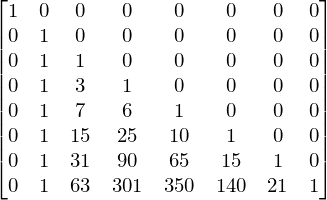

In [5]:
S2 = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
S2

In [6]:
data, eigenvals, multiplicities = eigendata = eigen_data(S2)
eigendata

In [7]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

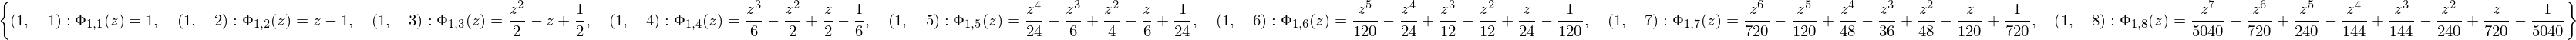

In [8]:
Phi_polynomials = component_polynomials_riordan(m)
Phi_polynomials

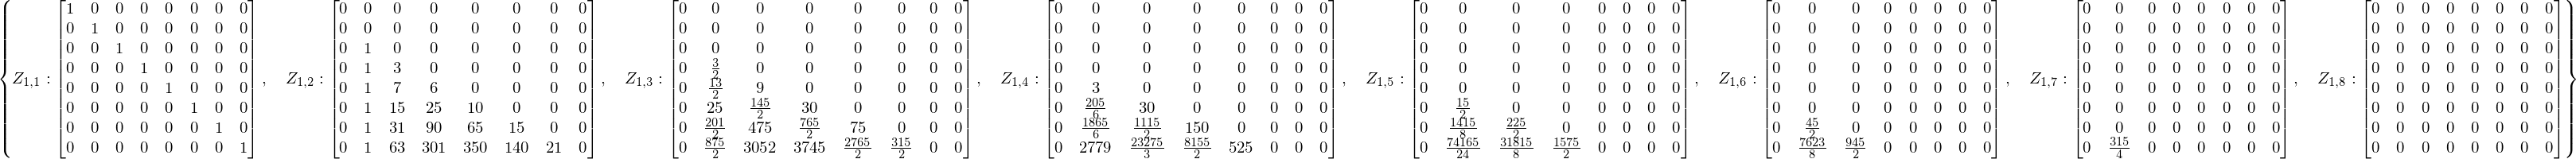

In [9]:
Z = IndexedBase('Z')
cmatrices = component_matrices(S2, Phi_polynomials)
{Z[k]:v for k,v in cmatrices.items()}

## `inverse` function

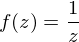

In [10]:
f = Function('f')
f_inverse = define(let=f(z), be=1/z)
f_inverse

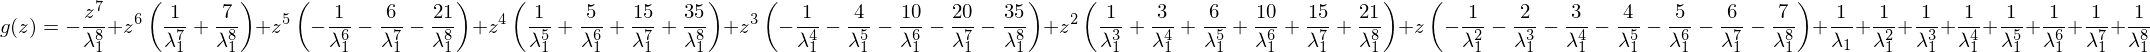

In [11]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [12]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

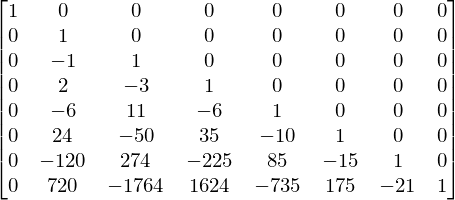

In [13]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    S2_inverse = g_inverse(S2)
S2_inverse

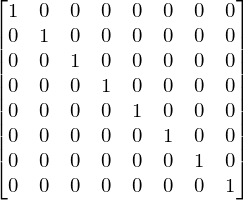

In [14]:
S2_inverse*S2

## `power` function

In [15]:
f, h = Function('f'), Function('h')
f_power = define(let=f(z), be=z**r)
f_power

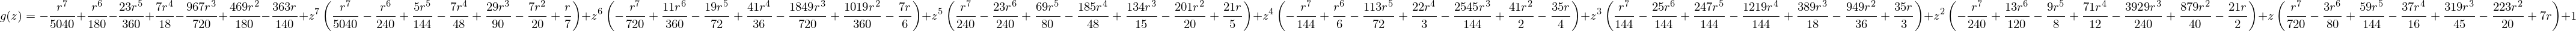

In [16]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power = g_power.subs(eigenvals)
g_power

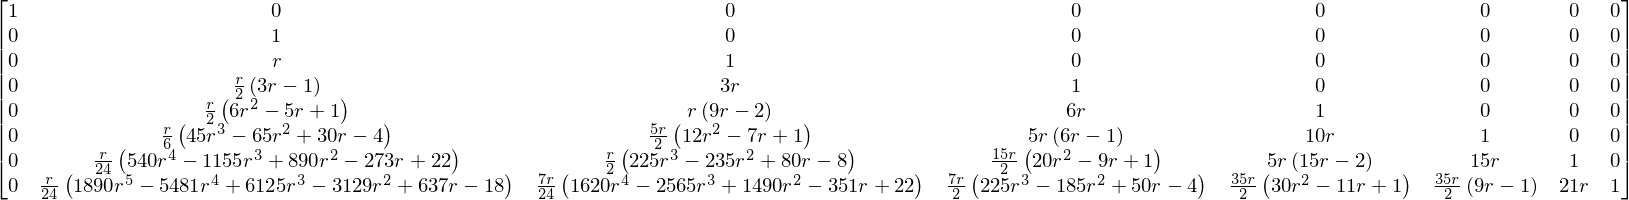

In [17]:
with lift_to_matrix_function(g_power) as g_power:
    S2_power = g_power(S2)
S2_power

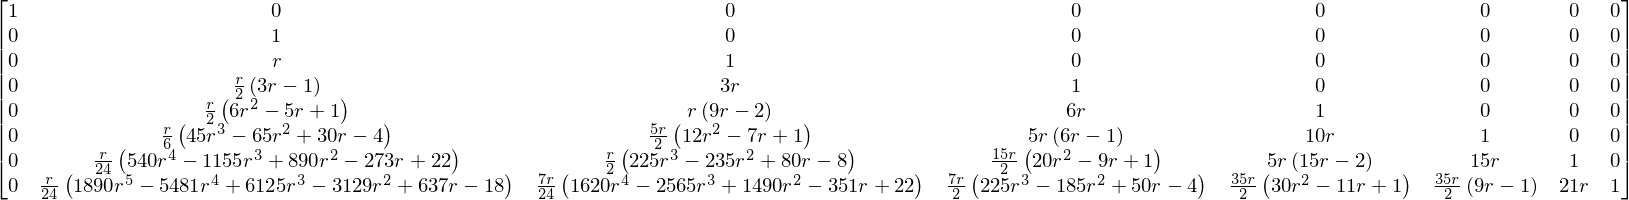

In [18]:
(S2**r).applyfunc(simplify)

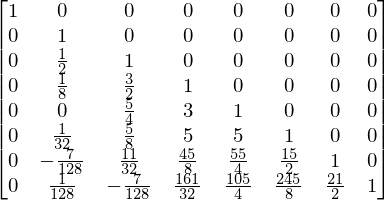

In [19]:
S2_power.subs({r:S(1)/2})

## `sqrt` function

In [20]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

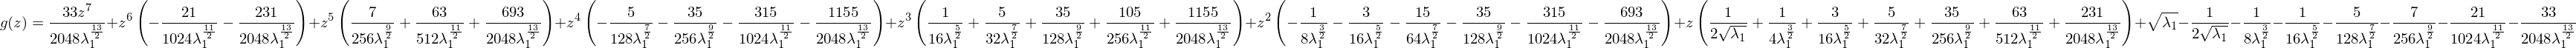

In [21]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

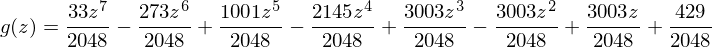

In [22]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

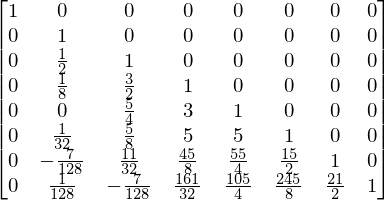

In [23]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    S2_sqrt = g_sqrt(S2)
S2_sqrt

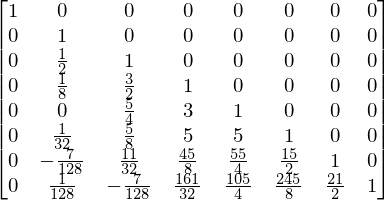

In [24]:
S2**(S(1)/2)

## `expt` function

In [25]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

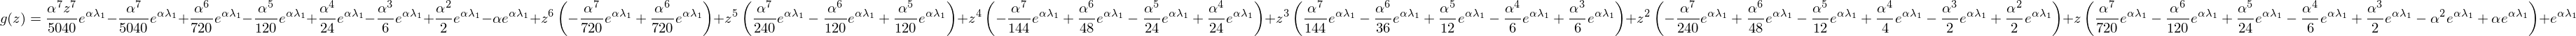

In [26]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

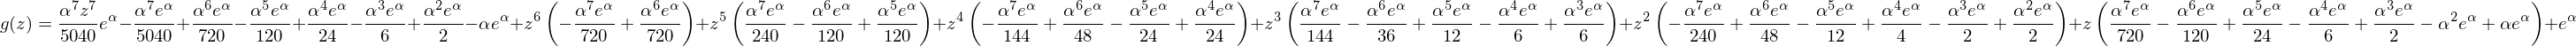

In [27]:
g_expt = g_expt.subs(eigenvals)
g_expt

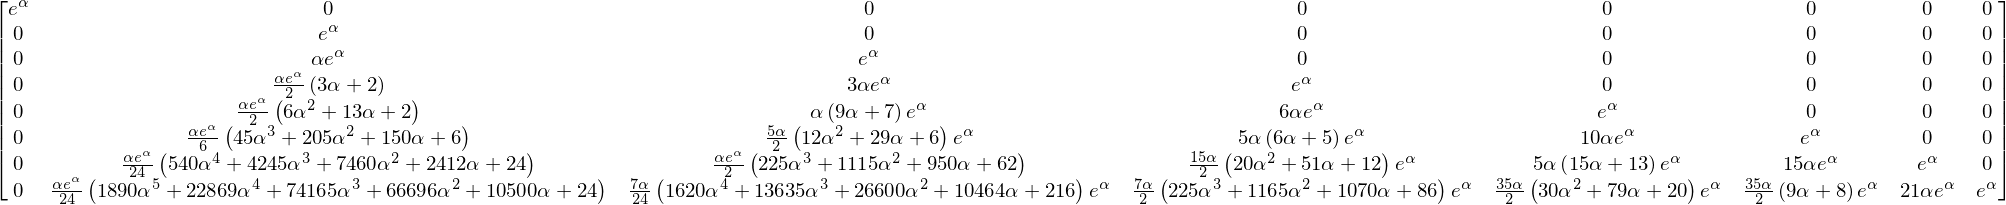

In [28]:
with lift_to_matrix_function(g_expt) as g_expt:
    S2_expt = g_expt(S2)
S2_expt

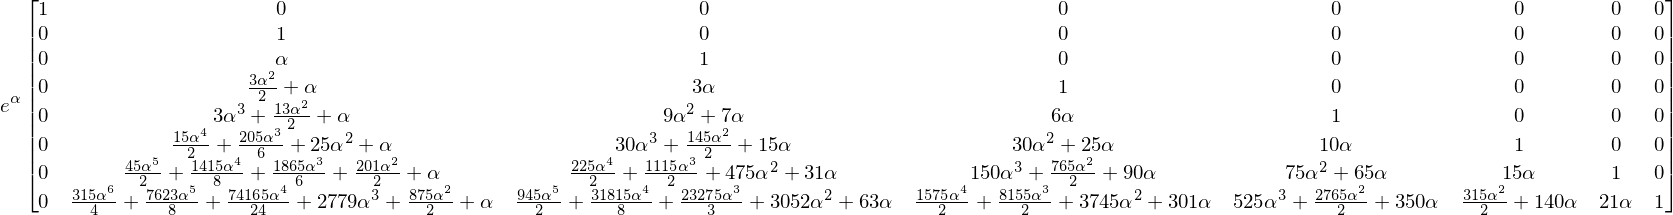

In [29]:
simp_S2_expt = Mul(exp(alpha), S2_expt.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_S2_expt

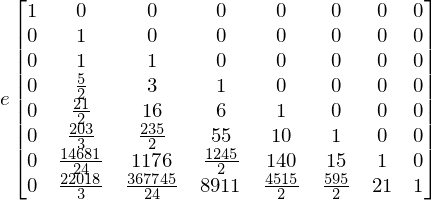

In [30]:
simp_S2_expt.subs({alpha:1})

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.